In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans # k-means
from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering


from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

np.random.seed(758475)

# Project 2

**this is NOT a group project**

So far in this course we have covered both *supervised* and *unsupervised* algorithms. Supervised algorithms *predict* a known outcome (either a continuous value like linear regression, or a categorical outcome like logistic regression, naive bayes, k-nearest neighbors, or decision trees), while unsupervised algorithms attempt to find structure in the data without a known outcome (like k-means, Gaussian Mixture Models (EM), or hierarchical agglomeretive clustering).

This project will use both, as well as compare the two. **You should write this project as if you're a data scientist who is presenting these results to people who are NOT data scientists**. You must put the answers the the questions (a-g/h) in a markdown cell and clearly indicate where you are answering each question.


## 1. Burgers or Pizza?

Using the dataset [*burgersOrPizza.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burgersOrPizza.csv), build 2 different models (each using a DIFFERENT algorithm, i.e. you cannot build two logistic regressions) that **predict whether or not a food item is a burger, or pizza**$^{[1]}$. 

**a)** explain which 2 algorithms you chose to use and why (including details like hyperparameters like k, max_depth...etc)

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)

**c)** explain whether or not you decided to z-score your variables and why.

**d)** choose ONE method of model validation, and explain why ( you must use the same method for both models; also, your reason must be based on aspects of the data and/or computational time/efficiency, and not on your lack of familiarity with the different methods).

**e)** explain how your model performed, and what metric you used to decide that.

**f)** compare the models: did one model do better than the other? Why do you think that was?

**g)** use ggplot to build at least 1 graph to help support your answers, and write a caption for this graph.




$^{[1]}$ The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

# 2. Donuts

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv) **build 2 clustering models** (using 2 different clustering algorithms)$^{[1]}$.

**a)** explain which 2 algorithms you chose to use and why (including which distance metrics you chose, similarity metrics..etc if applicable and why)

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)

**c)** explain whether or not you decided to z-score your variables and why.

**d)** use silhouette scores to choose the number of clusters. Is the number of clusters the same for both of your models?

**e)** explain how your models performed, and what metric you used to decide that.

**f)** compare the models: how similar were the clusters between the two models?

**g)** use ggplot to build a graph that helps demonstrate your point for part f, and write a caption for this graph.

**h)** for both models, plot the clusters with ggplot and describe each cluster (using bullet points). Talk about what characterizes each cluster (e.g. which variables that cluster is high/low in), and give a general descriptor for the cluster (e.g. "these donuts are likely seasonal donuts" or "these are healthy and/or gluten free donuts" etc...)

$^{[1]}$ The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [2]:
#1

borp = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burgersOrPizza.csv")

print(borp.shape)
borp.head()

(927, 25)


,Item_Name,Item_Description,Food_Category,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Potassium,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Chicken n Cheese Slider,Chicken n Cheese Slider on Mini Bun w/ Chicken...,Burgers,290.0,12.0,3.5,0.0,25.0,720.0,NaN,...,12,4,0.0,25,727,NaN,30,15,1.0,1.0
1,Corned Beef n Cheese Slider,Corned Beef n Cheese Slider on Mini Bun w/ Cor...,Burgers,220.0,9.0,3.5,0.0,30.0,890.0,NaN,...,10,4,0.0,33,978,NaN,23,15,1.0,1.0
2,Ham n Cheese Slider,Ham n Cheese Slider on Mini Bun w/ Roast Ham &...,Burgers,230.0,9.0,3.5,0.0,30.0,750.0,NaN,...,10,4,0.0,33,824,NaN,24,14,3.0,1.0
3,Jalapeno Roast Beef n Cheese Slider,Jalapeno Roast Beef n Cheese Slider on Mini Bu...,Burgers,240.0,11.0,4.5,0.0,30.0,670.0,NaN,...,11,5,0.0,31,684,NaN,21,14,1.0,1.0
4,Roast Beef n Cheese Slider,Roast Beef n Cheese Slider on Mini Bun w/ Roas...,Burgers,240.0,11.0,4.5,0.0,30.0,670.0,NaN,...,12,5,0.0,33,736,NaN,23,15,1.0,1.0


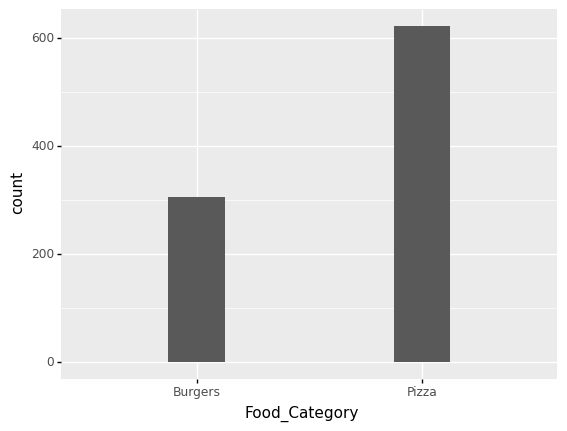

<ggplot: (122659447387)>

In [3]:
ggplot(borp, aes(x="Food_Category")) + geom_histogram()

There is an unreasonable data entry for Saturated_Fat_100g: the "1/3 lb Budweiser Beer Cheese Bacon Thickburger" has a value of 572 for Saturated_Fat_100g, the next highest is 10.

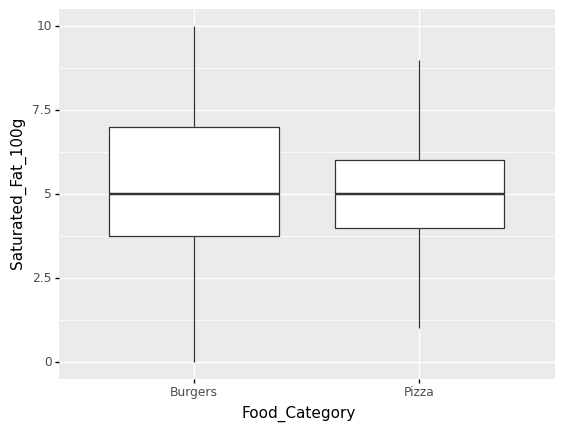

<ggplot: (122659474607)>

In [4]:
vlaid_SatFat = borp["Saturated_Fat_100g"] != 572
borp2 = borp.loc[vlaid_SatFat]

ggplot(borp2, aes(x="Food_Category", y="Saturated_Fat_100g")) + geom_boxplot()

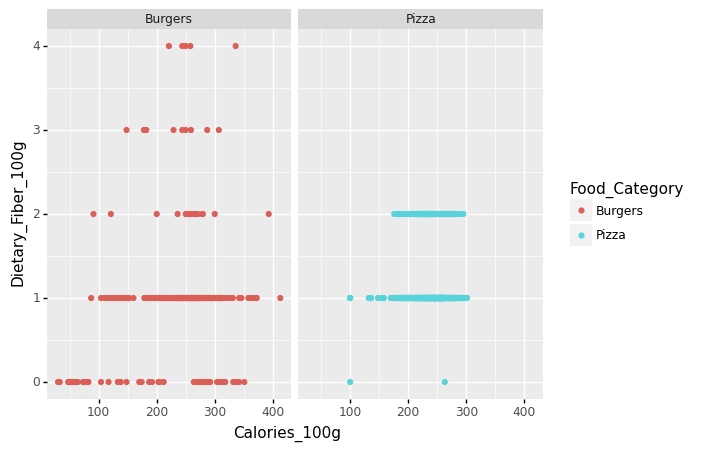

<ggplot: (122659711251)>

In [5]:
ggplot(borp, aes(x="Calories_100g", y="Dietary_Fiber_100g", color="Food_Category")) + geom_point() + facet_wrap("Food_Category")

In [6]:
predictors = ["Calories_100g", "Total_Fat_100g", "Saturated_Fat_100g", "Trans_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g", "Sugar_100g"]

pred_outcome = predictors.copy()
pred_outcome.append("Food_Category")

borp3 = borp2[pred_outcome]
borp3 = borp3.dropna()

X = borp3[predictors]
y = borp3["Food_Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5464, shuffle=True)
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, random_state = 8946, shuffle=True)

X_train.head()

,Calories_100g,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g
53,187,14,6,1.0,40,465,3,13,2.0
125,199,9,4,0.0,22,532,20,9,2.0
215,226,9,4,0.0,24,568,26,10,3.0
775,242,9,5,0.0,26,614,29,12,5.0
94,291,20,8,1.0,63,408,12,16,2.0


In [7]:
z = StandardScaler()

z.fit(X_train)
XZ_train = z.transform(X_train)
XZ_test = z.transform(X_test)
XZ_train_valid = z.transform(X_train_valid)
XZ_test_valid = z.transform(X_test_valid)

### Decision Tree

In [8]:
# run a rough model on the whole training set to find a natural max depth

tree = DecisionTreeClassifier(random_state = 543)
tree.fit(X_train,y_train)

maxDepth = tree.get_depth()

In [9]:
# perform hyperparameter tuning

tunedAcc = 0
tunedDepth = 0

for i in range(1, maxDepth+1):
    tree_temp = DecisionTreeClassifier(random_state = 1654, max_depth=i)
    tree_temp.fit(X_train_valid,y_train_valid)

    acc = accuracy_score(y_test_valid, tree_temp.predict(X_test_valid))

    if acc > tunedAcc:
        tunedAcc = acc
        tunedDepth = i

print(tunedDepth)

8


Accuracy Score:  0.9553072625698324


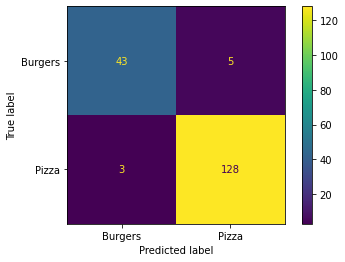

In [10]:
# Fit the model with the tuned max depth and the entire training set

tree = DecisionTreeClassifier(random_state = 56465, max_depth=tunedDepth)

tree.fit(X_train,y_train)

print("Accuracy Score:  " + str(accuracy_score(y_test,tree.predict(X_test))))
plot_confusion_matrix(tree, X_test, y_test)

### K Nearest Neighbors

In [11]:
#perform hyperparameter tuning to find the optimal value for k

tunedAcc = 0
tunedK = 0

for i in range(1, XZ_train_valid.shape[0]):
    knn_temp = KNeighborsClassifier(n_neighbors = i)
    knn_temp.fit(XZ_train_valid, y_train_valid)

    acc = accuracy_score(y_test_valid, knn_temp.predict(X_test_valid))

    if acc > tunedAcc:
        tunedAcc = acc
        tunedK = i

print(tunedK)

43


Accuracy Score:  0.88268156424581


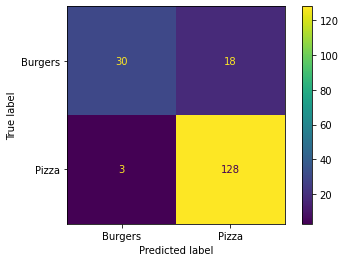

In [12]:
# Fit the model with the tuned k neighbors and the entire training set

knn = KNeighborsClassifier(n_neighbors = tunedK)

knn.fit(X_train,y_train)

print("Accuracy Score:  " + str(accuracy_score(y_test,knn.predict(X_test))))
plot_confusion_matrix(knn, X_test, y_test)

**a)** explain which 2 algorithms you chose to use and why (including details like hyperparameters like k, max_depth...etc)
- Decision Tree: *Decision trees categorize data points by /After sifting through the data, by plotting box plots for each variable, it was clear that* 
- K- Nearest Neighbors:

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)
- Because the different foods come in so many different size portions, only variables per 100 grams of food are used so all data points are standardized based on thier composition. The name and description of the food is disregarded as well. Among the remaining variables, Potassium_100g is dropped because there are simply too many missing values (none of the pizzas have a value for Potassium_100g), and Dietary_Fiber_100g is dropped because there is simply too little variance in this variable; the averages are the same for both food types and there are only a handful of burgers with more than a value of 2 for fiber in the data set.
- The remaining predictors are:
    - Calories_100g
    - Total_Fat_100g
    - Saturated_Fat_100g
    - Trans_Fat_100g
    - Cholesterol_100g
    - Sodium_100g
    - Carbohydrates_100g
    - Protein_100g
    - Sugar_100g

**c)** explain whether or not you decided to z-score your variables and why.
- The variables were z-scored so all predictors are on the same scale.Some of the predictors have wide numerical ranges and lots of possible values (e.g. Calories_100g ranges from 20 to 413), while others have much smaller ranges (e.g. Saturated_Fat_100g ranges from 0-10). Note: standardization is irrelevand when using decision trees because there is no assumption that the data is all on the same scale. However, z-scoring is required when using KNN because the algorithm calculates distance between points; if the data is not standardized, data on smaller scales would hold much more weight than other variables. This technically introduces a tiny bit of data leakage into the validation set, but that should be negligable.he final model, the standardized values will be used.

**d)** choose ONE method of model validation, and explain why ( you must use the same method for both models; also, your reason must be based on aspects of the data and/or computational time/efficiency, and not on your lack of familiarity with the different methods).
    - Train-Test-Split (training on 80% of the data) with hyperparameter tuning (using a validation set that is 20% of the training data) is beign used. Because of the use of hyperparameter tuning, performance is of higher importance, even considering the relatively small data set. Using a validation set with k-fold or leave one out would greatly increase complexity and time of computation. TTF allows for quick and simple model validation and hyperparameter tuning.

**e)** explain how your mode
- Decision Tree:
    - The model performed extremely well and doesn't seem to be overfit. The accuracy score is extremely high and the confusion matrix shows that for the test set, the model was only incorrect 8 times. It's worth noting that the model is far more likely to falsely classify something as pizza when it is actually a burger than to incorrectly lable pizza as a burger.
- K- Nearest Neighbors:l performed, and what metric you used to decide that.

**f)** compare the models: did one model do better than the other? Why do you think that was?

**g)** use ggplot to build at least 1 graph to help support your answers, and write a caption for this graph.

In [13]:
#2 

**a)** explain which 2 algorithms you chose to use and why (including which distance metrics you chose, similarity metrics..etc if applicable and why)

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)

**c)** explain whether or not you decided to z-score your variables and why.

**d)** use silhouette scores to choose the number of clusters. Is the number of clusters the same for both of your models?

**e)** explain how your models performed, and what metric you used to decide that.

**f)** compare the models: how similar were the clusters between the two models?

**g)** use ggplot to build a graph that helps demonstrate your point for part f, and write a caption for this graph.

**h)** for both models, plot the clusters with ggplot and describe each cluster (using bullet points). Talk about what characterizes each cluster (e.g. which variables that cluster is high/low in), and give a general descriptor for the cluster (e.g. "these donuts are likely seasonal donuts" or "these are healthy and/or gluten free donuts" etc...)